# Does including "Free" in the app name make a difference? A statistical analysis

## Introduction

The word "FREE" usually is used to attract new customers to a new or current product as part of marketing campaigns, because the word "FREE" draws customers eyes to where the businesses want them to go. But, is this theory works in the app market where most of the apps available on Google Play store or Apple Appstore are free. Some argue adding the word "FREE" to the app name attract more users in the mobile app market as well, while others think it lost its magic on users eyes since developers are more tend to create free apps and generate income from attracting customers to buy pro versions or upgrades while using the app.

In this analysis, a sample of web scraped data by Lavanya Gupta of 10k Play store apps has been used to analyze the effect of using the word "FREE" in the app name (title) by evaluating the change in users Rating, the number of users Reviews and the total number of app Installs.

## Data Frame

The data in this analysis consist of app details and metrics of 10,841 apps. The dataset consists of 13 columns as following:

1- App: Application name - title.

2- Category: The apps are divided into 34 categories.

3- Rating: Overall users rating of the app.

4- Reviews: Number of users reviews for the app.

5- Size: Size of the app.

6- Installs: Number of downloads/installs of the app.

7- Type: type of the app (Paid or Free).

8- Price: Price of the app (for paid apps only).

9- Content Rating: Age group the app is targeted at (80% of the apps are targeting everyone).

10- Genres: There are 118 genres and apps can belong to multiple genres apart of its main category.

11- Last Updated: Dates when the app was last updated on Play store.

12- Current Ver: the current version of the app available on Play store.

13- Android Ver: Minimum required Android version.

you can find below the first five rows of the dataset for illustration. The total number of lines is 10,841 line as it shows below:

In [712]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
play_store = pd.read_csv('C:/Users/rabia/Desktop/Thinkful/Capstone project 1/googleplaystore.csv')
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [713]:
len(play_store)

10841

The data need to be checked and cleaned of any duplication or wrong entries. For example, some apps have been presented in the data frame more than once under different categories like “Coloring book moana” app which is available twice in the dataset under "Family" and "Art and Design" categories.

In [714]:
play_store.loc[(play_store['App'] == 'Coloring book moana')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2033,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In the process of the data cleaning, wrong entries need to be removed such as category "1.9" with an average rating of "19.0" which is certainly a wrong entry.

In [715]:
play_store.loc[(play_store['Category'] == '1.9')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The code lines below are used to sort the values under "App" column, then remove any duplicates under the same column. The last code line is to remove any rows with a "Category" value of "1.9".

In [716]:
play_store.sort_values('App', inplace = True)
play_store.drop_duplicates(subset = 'App', keep = False, inplace = True)
play_store=play_store[~play_store['Category'].str.contains('1.9')]

For the purpose to facilitate the analysis and plotting the data frames, The values of columns "Rating", "Reviews", and "Installs" need to be numeric. As shown below, only the "Rating" column values are numeric, while "Reviews" and "Installs" values need to be converted to be numeric.

In [717]:
play_store.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In order to convert the "Rating" column values to numeric. all the "NaN" values need to be replaced by "0". This doesn't mean that all these apps received a "Zero" rating, but it has been replaced by "Zero" to facilitate the plotting and analysis of the data.

In [718]:
play_store[pd.isnull(play_store['Rating'])].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
2483,14thStreetVet,MEDICAL,NaN,0,29M,5+,Free,0,Everyone,Medical,"July 16, 2018",300000.1.11,4.0.3 and up
7382,1st Fed CI Mobile Banking,FINANCE,NaN,0,31M,500+,Free,0,Everyone,Finance,"September 29, 2016",6.0.0.1775,4.1 and up
6518,2017 BN SM Sales Conference,BUSINESS,NaN,2,10M,100+,Free,0,Teen,Business,"September 28, 2017",v2.7.11.6,4.1 and up
9660,23rd QM BDE EO,BUSINESS,NaN,0,6.3M,10+,Free,0,Everyone,Business,"September 27, 2017",1.0.0,4.1 and up


In [719]:
play_store['Rating'].fillna(0, inplace=True)

The below code lines are used to change all values under "Rating" column to "Floats", and all the values under "Reviews" column to Integers.

In [720]:
play_store.Rating = play_store.Rating.astype(float)
play_store.Reviews = play_store.Reviews.astype(int)

The values under "Installs" column are strings and categorical. A new column with the name "installs_numeric" has been created with the same values in "Installs" column after removing "+" and "," symbols, and converting them to integers. This new column has been created to have the ability to sort the number of installs.

In [721]:
play_store['installs_numeric'] = pd.to_numeric(play_store['Installs'].str.replace('+','').str.replace(',','')
                                 , errors='ignore')
play_store.installs_numeric = play_store.installs_numeric.astype(int)

Finally, we have "Reviews" and "installs_numeric" columns values as integers, and the "Rating" column as Float. the total number of rows in the data frame is 8,861 rows. This means that, the total number of apps in this study has been reduced from 10,841 to 8,861 apps.

In [722]:
play_store.dtypes

App                  object
Category             object
Rating              float64
Reviews               int32
Size                 object
Installs             object
Type                 object
Price                object
Content Rating       object
Genres               object
Last Updated         object
Current Ver          object
Android Ver          object
installs_numeric      int32
dtype: object

In [724]:
len(play_store)

8861

## Data Visualization

In this section, the data will be visualized out to check its insights and provide comments and findings (if applicable).

### Number of Apps per Category

First, the number of apps per each category will be plotted to check which categories are more or less represented compare to the others.

To visualize the count of the apps per each category, the apps have been grouped by category, then plotted the count of the values (apps) per each category as it is shown below:

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 <a list of 9 Text yticklabel objects>)

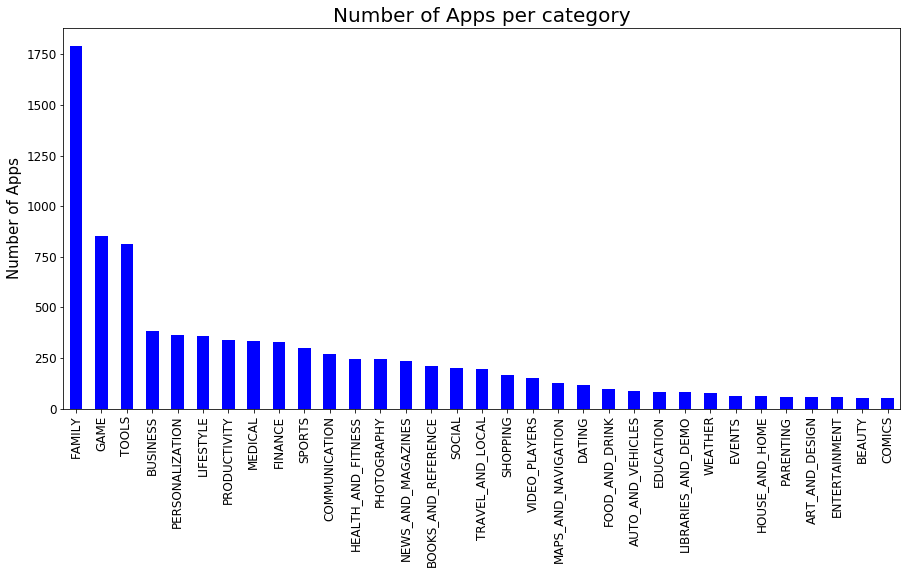

In [785]:
play_store_category = play_store.groupby('Category').mean()
plt.figure(figsize=(15,7))
play_store.Category.value_counts().plot(kind='bar', color = 'blue')
plt.ylabel('Number of Apps', fontsize = 15)
plt.title('Number of Apps per category', fontsize = 20)
plt.xticks(fontsize='12')
plt.yticks(fontsize='12')

As it is shown in the above bar chart, the "Family" category is the most represented category in the data frame by approximately (20%). "Game" and "Tools" categories are well represented as well compare to the rest of the apps.

### The Distribution of Users Rating

Second, the distribution of users ratings of the apps is plotted using the bar chart. Over 1,400 apps did not receive a rating from the users (Remember, that "Zero" rating does not mean unsatisfied users but a lack of users rating). By ignoring these apps (approx. 1,400 apps), the distribution of the users rating is skewed to the left. Most of the apps received more than 4.0 rating score, this indicate that, users are more tend to provide a rating score of over 4.0. App developers should not consider a score of 4.0 as a positive rating since most of the apps received a higher score. You can see the bar chart of the rating count below: 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

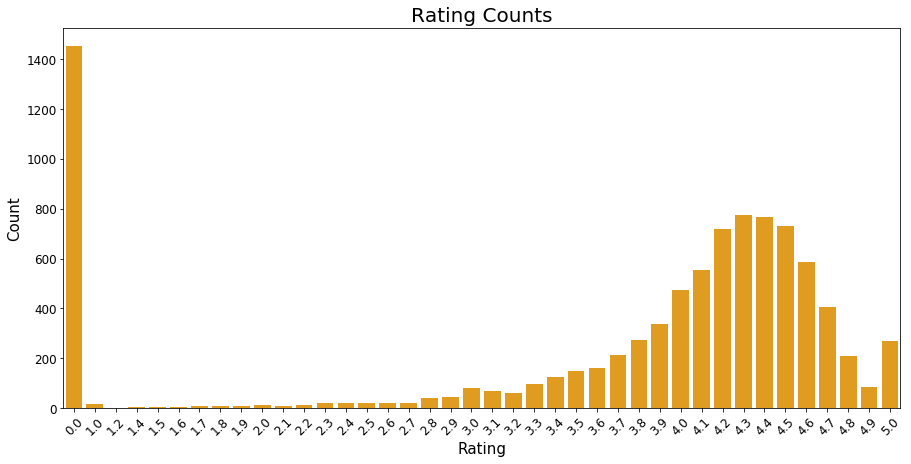

In [786]:
plt.figure(figsize=(15,7))
rating_count = sns.countplot(x="Rating", data=play_store, color= 'orange')
rating_count.axes.set_title("Rating Counts",fontsize=20)
rating_count.set_xlabel("Rating",fontsize=15)
rating_count.set_ylabel("Count",fontsize=15)
rating_count.tick_params(labelsize=12)
plt.xticks(rotation=45)

The average rating does not defer much between most of the categories as it appears in the bar chart below. "Business", "Dating" and "Medical:" apps received a relatively low average rating compare to highly rated apps such as "Education" and "Art and Design" apps. The average rating for each category apps is represented in the y-axes of the bar chart below:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

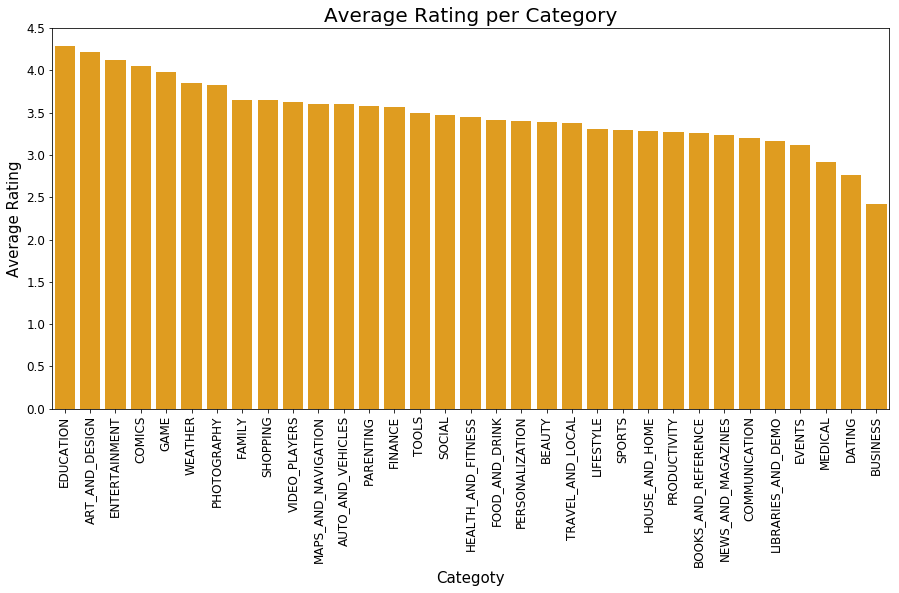

In [782]:
play_store_category = play_store.groupby('Category').mean().sort_values(('Rating'), ascending=False)
plt.figure(figsize=(15,7))
avg_sent_pol = sns.barplot(x=play_store_category.index, y=play_store_category.Rating, data=play_store_category, color ='orange')
avg_sent_pol.axes.set_title("Average Rating per Category",fontsize=20)
avg_sent_pol.set_xlabel("Categoty",fontsize=15)
avg_sent_pol.set_ylabel("Average Rating",fontsize=15)
avg_sent_pol.tick_params(labelsize=12)
plt.xticks(rotation=90)

### Number of installs

Third, the distribution of apps number of installs has been evaluated. The data frame has been grouped by the number of installs "installs_numeric". The new data frame "play_store_installs" is shown below:

In [766]:
play_store_installs = play_store.groupby('installs_numeric').mean()
play_store_installs

,Rating,Reviews
installs_numeric,,
0,0.000000,0.000000e+00
1,0.223881,2.985075e-01
5,0.506098,5.365854e-01
10,0.830990,1.091146e+00
50,1.219212,2.394089e+00
100,1.848930,5.455064e+00
500,2.525460,1.224233e+01
1000,3.178136,3.702186e+01
5000,3.652928,9.897397e+01


The count plot of the number of installs is shown below. Most of the apps have been installed between 100 and 50,000,000 times.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

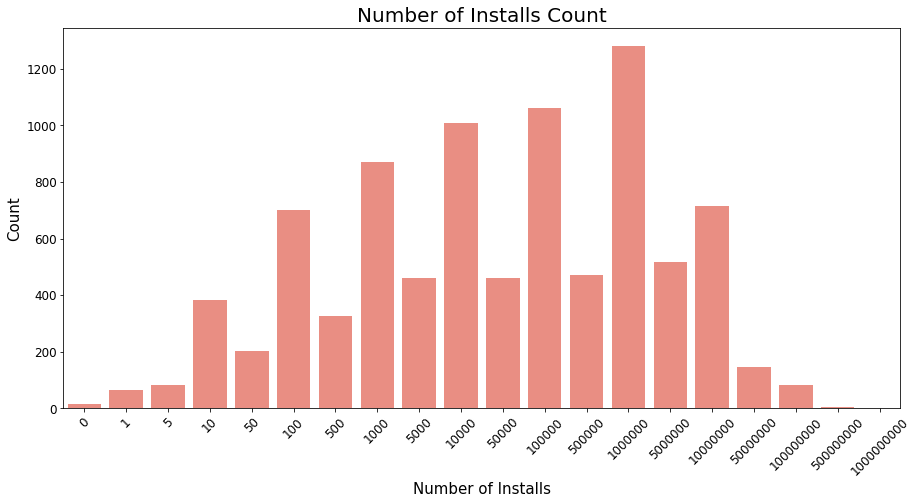

In [781]:
plt.figure(figsize=(15,7))
installs_numeric_count = sns.countplot(x="installs_numeric", data=play_store, color= 'salmon')
installs_numeric_count.axes.set_title("Number of Installs Count",fontsize=20)
installs_numeric_count.set_xlabel("Number of Installs",fontsize=15)
installs_numeric_count.set_ylabel("Count",fontsize=15)
installs_numeric_count.tick_params(labelsize=12)
plt.xticks(rotation=45)

The average rating increases as the number of installs increases as it shown in the below bar chart between the number of installs and the average users rating. This looks logical because a higher number of installs usually is a representation of a successful app, and successful apps usually receive higher and positive users rating.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

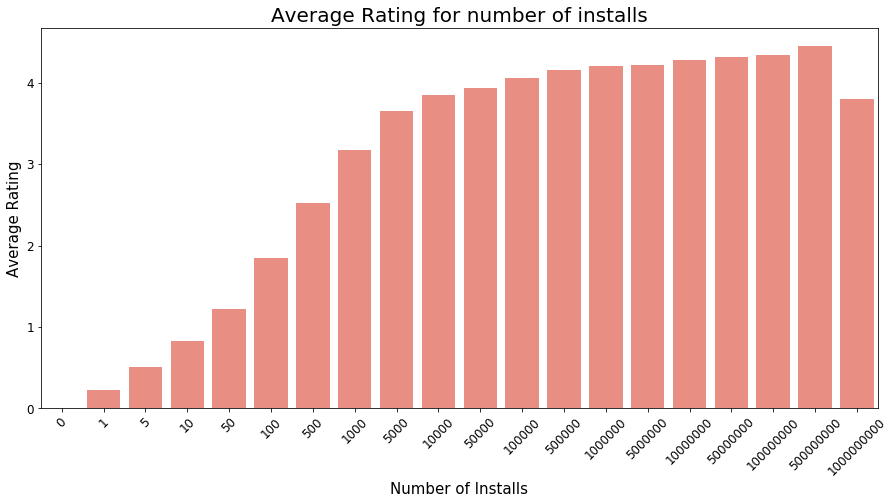

In [779]:
plt.figure(figsize=(15,7))
installs_rating = sns.barplot(x=play_store_installs.index, y=play_store_installs.Rating, data=play_store_installs, color ='salmon')
installs_rating.axes.set_title("Average Rating for number of installs",fontsize=20)
installs_rating.set_xlabel("Number of Installs",fontsize=15)
installs_rating.set_ylabel("Average Rating",fontsize=15)
installs_rating.tick_params(labelsize=12)
plt.xticks(rotation=45)

## Research Questions

Q1) Do the "Number of Installs" increase when the word "FREE" included in the app name?

Q2) Are the users more satisfied with the apps include the "FREE" word in the app name? Do they have higher Rating?

Q3) Do the users provide more feedback through "Reviews" for the apps with the "FREE" word in thier names?

## Analysis

Most of the apps in this data frame are "Free" apps (approx. more than 90%), while few apps are "Paid". This is clearly represented in the below bar chart below which shows the apps count of "Free" and "Paid" apps.

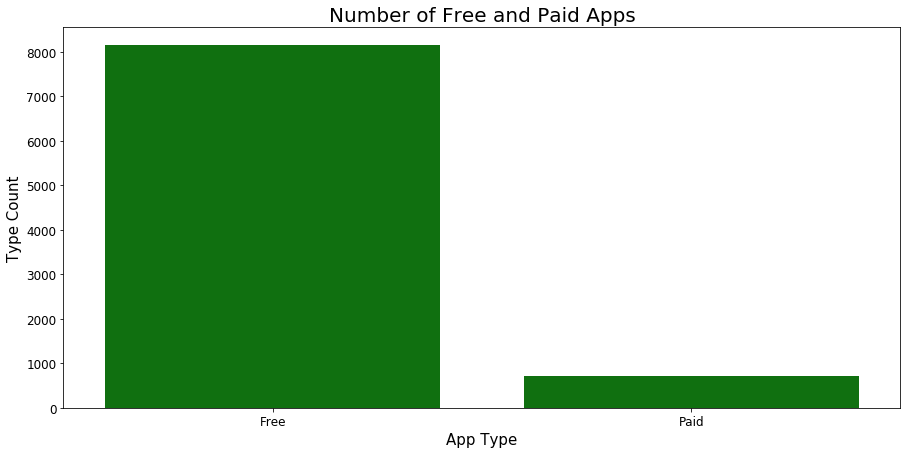

In [778]:
plt.figure(figsize=(15,7))
rating_count = sns.countplot(x="Type", data=play_store, color= 'green')
rating_count.axes.set_title("Number of Free and Paid Apps" ,fontsize=20)
rating_count.set_xlabel("App Type",fontsize=15)
rating_count.set_ylabel("Type Count",fontsize=15)
rating_count.tick_params(labelsize=12)

To evaluate the effect of including the word "FREE" in the app name (title), The data frame has been divided into two data frames. One for the apps contains the word "FREE" in the app name(title) (free_app_name), and the other dataset will retain the remaining apps (no_free_app_name).

The below code lines are used to create two data frames. the first data frame (free_app_name) includes all the apps with the word "FREE" in the app name, the option case=False make sure we include all the apps contain the word "FREE" regardless if its upper- or lower-cased word. the other data frame used similar code lines, but it includes the symbol "~" which change the output to show the opposite of the output of the first data frame.

In [732]:
free_app_name=play_store[play_store['App'].str.contains('free', case=False)] 
free_app_name.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,installs_numeric
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,10000
4875,30 Day Ab Challenge FREE,HEALTH_AND_FITNESS,4.3,48253,Varies with device,"1,000,000+",Free,0,Everyone,Health & Fitness,"December 13, 2017",Varies with device,Varies with device,1000000
4568,"360 Security - Free Antivirus, Booster, Cleaner",TOOLS,4.6,16771865,Varies with device,"100,000,000+",Free,0,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device,100000000
5076,50000 Free eBooks & Free AudioBooks,BOOKS_AND_REFERENCE,4.1,52312,11M,"5,000,000+",Free,0,Teen,Books & Reference,"May 19, 2018",5.3.4,4.4 and up,5000000
729,ABC Preschool Free,EDUCATION,3.8,27572,25M,"5,000,000+",Free,0,Everyone,Education;Education,"October 25, 2017",3.0,2.3 and up,5000000


In [733]:
no_free_app_name=play_store[~play_store['App'].str.contains('free', case=False)]
no_free_app_name.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,installs_numeric
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,0.0,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,500
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,1000000
4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,10000
4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,10000
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,100


367 of the apps include the word "FREE" in the app name. This number is relatively low if we know over 90% of the apps in this study were Free apps. This means the inclusion of the word "FREE" in the app name is not common.

In [734]:
len(free_app_name)

367

In [735]:
len(no_free_app_name)

8494

### Research Question #1 : "Number of Installs"

First, The number of installs count for the (free_app_name) and (no_free_app_name) data frames has been plotted using the codes below. Subplots feature is used to facilitate the comparison between the two plots. The "blue" color bars to the left represents the (free_app_name) data frame, while the "red" color bars represent the other data frame.

As shown below, the distribution of the number of installs count does not defer between both data frames. Both of them are skewed to the left.

The average number of installs is higher for the apps that include the word "FREE" in the app name (4.26 million installs) compare to an average of (3.49 million) installs for the rest of the apps. The standard deviation is less for the apps that include "Free" on their names compare to the rest of the apps which means it is more clustered.

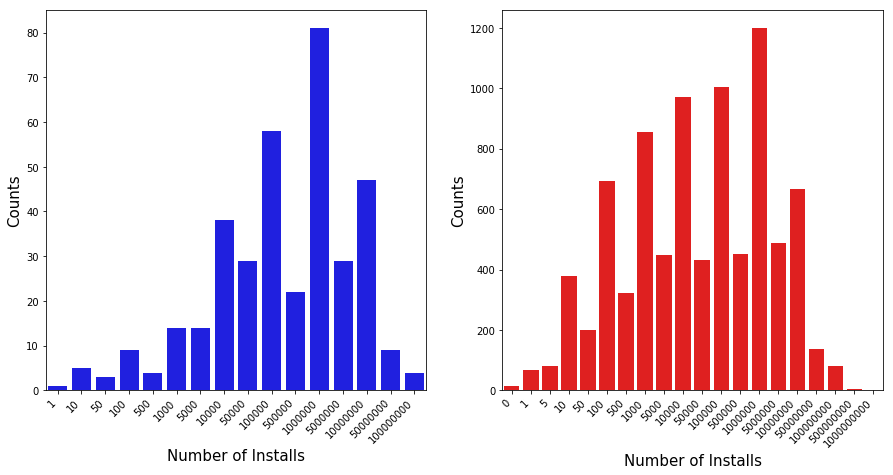

In [791]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(free_app_name['installs_numeric'], color='blue')
plt.xlabel('Number of Installs', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
sns.countplot(no_free_app_name['installs_numeric'], color='red')
plt.xlabel('Number of Installs', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

In [737]:
free_app_name["installs_numeric"].describe()

count    3.670000e+02
mean     4.263534e+06
std      1.294597e+07
min      1.000000e+00
25%      5.000000e+04
50%      5.000000e+05
75%      1.000000e+06
max      1.000000e+08
Name: installs_numeric, dtype: float64

In [738]:
no_free_app_name["installs_numeric"].describe()

count    8.494000e+03
mean     3.481769e+06
std      2.203133e+07
min      0.000000e+00
25%      1.000000e+03
50%      5.000000e+04
75%      1.000000e+06
max      1.000000e+09
Name: installs_numeric, dtype: float64

### Research Question #2 : "Users Rating"

Second, distribution plot for the two data frames has been plotted to evaluate any difference between them in terms of users rating. The plot combines both distributions in the same plot. The "blue" color represents (free_app_name) data frame while the "red" color represents  (no_free_app_name) data frame.

The plot shows a higher average rating for the apps contain the word "FREE" in the app name (4.04) compare to an average score of (3.45) for the rest of the apps. The distribution of (free_app_name) data frame is less spread out and more clustered (standard deviation = 0.93) compare to the rest of the apps (standard deviation = 1.63).

There is a significant number of apps with a zero-rating score, which represents (NaN - no user rating). The number of apps with zero rating score is significantly higher with the apps which do not include the word "FREE" in the app name. These outliers have their effect on the mean, standard deviation, and the distribution of both data frames. 

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 <a list of 10 Text yticklabel objects>)

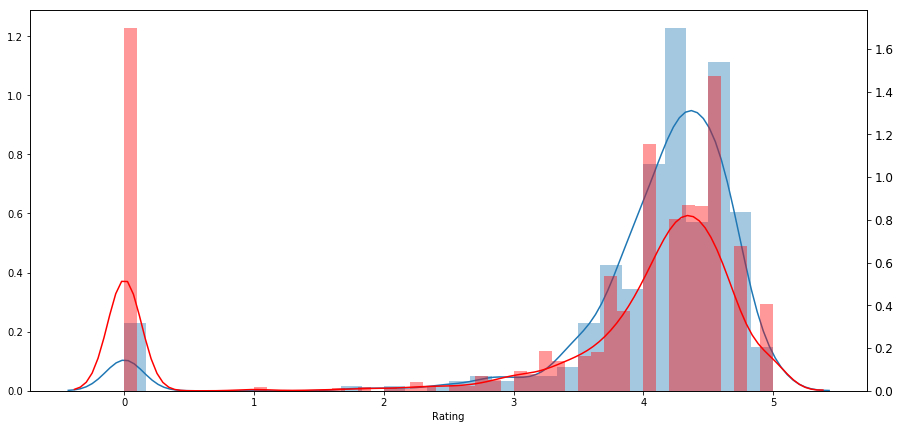

In [788]:
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(free_app_name["Rating"], ax=ax)
ax2 = ax.twinx()
sns.distplot(no_free_app_name["Rating"], ax=ax2, color='red')
plt.xlabel("Rating",fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

In [740]:
free_app_name["Rating"].describe()

count    367.000000
mean       4.040599
std        0.929341
min        0.000000
25%        3.900000
50%        4.300000
75%        4.500000
max        5.000000
Name: Rating, dtype: float64

In [741]:
no_free_app_name["Rating"].describe()

count    8494.000000
mean        3.452602
std         1.640399
min         0.000000
25%         3.500000
50%         4.200000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

The apps with "Zero" rating scores (Outliers) need to be removed from the dataset to isolate their effect on the analysis. As explained previously, The "Zero" score does not mean a low rating but it is a result of no feedback from the users on thier experience with the app. Including these "Zero" scores might result in misleading results and conclusions. 

Therefore, a new data frames (free_app_name_no_zero) and (no_free_app_name_no_zero) has been created by removing all the rows with a rating score of "Zero", and then the same previous analysis has been repeated on the new data frames.

After removing the apps with "Zero" score from both data frames, both distributions and statistics look similar. the means (4.20 vs 4.16) and standard deviation (0.47 vs 0.56) are very close. These findings are different from the previous findings above.

In [742]:
free_app_name_no_zero=free_app_name.loc[free_app_name['Rating'] != 0]
no_free_app_name_no_zero=no_free_app_name.loc[no_free_app_name['Rating'] != 0]

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 <a list of 8 Text yticklabel objects>)

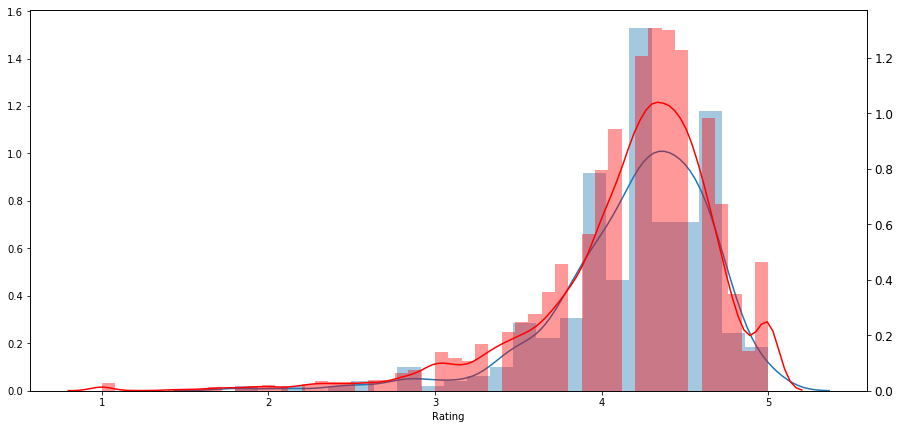

In [802]:
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(free_app_name_no_zero["Rating"], ax=ax)
ax2 = ax.twinx()
sns.distplot(no_free_app_name_no_zero["Rating"], ax=ax2, color='red')
plt.xlabel("Rating",fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

In [745]:
free_app_name_no_zero["Rating"].describe()

count    353.00000
mean       4.20085
std        0.47215
min        1.80000
25%        4.00000
50%        4.30000
75%        4.50000
max        5.00000
Name: Rating, dtype: float64

In [744]:
no_free_app_name_no_zero["Rating"].describe()

count    7054.000000
mean        4.157414
std         0.556501
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

### Research Question #3 : "Number of Users Reviews"

Finally, Histograms plots for the two data frames are shown below to evaluate if the number of reviews changes as a result of inclusion or exclusion of the word "FREE". The "blue" color represents (free_app_name) data frame while the "red" color represents  (no_free_app_name) data frame.


In general, the apps with the "FREE" word in the app name received a higher average number of reviews (141,299) compare to the average of (97,762) for the rest of the apps.

The histograms below are more clustered close to "Zero". This is mainly because of the outliers in both data frames. If you check the maximum values of both data frames and compared them to the 75% percentile you can see a huge difference.

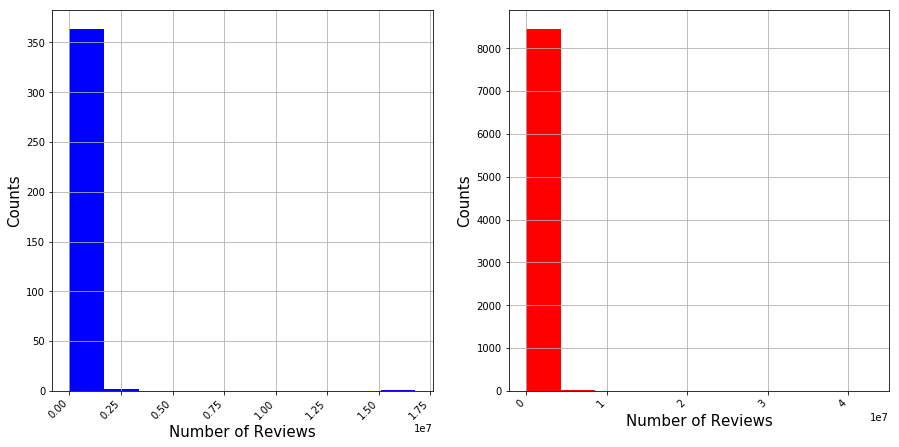

In [795]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
free_app_name['Reviews'].hist(color='blue')
plt.xlabel('Number of Reviews', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
no_free_app_name['Reviews'].hist(color='red')
plt.xlabel('Number of Reviews', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

In [747]:
free_app_name["Reviews"].describe()

count    3.670000e+02
mean     1.412989e+05
std      9.160876e+05
min      0.000000e+00
25%      4.140000e+02
50%      5.639000e+03
75%      4.961150e+04
max      1.677186e+07
Name: Reviews, dtype: float64

In [748]:
no_free_app_name["Reviews"].describe()

count    8.494000e+03
mean     9.758984e+04
std      7.263431e+05
min      0.000000e+00
25%      1.700000e+01
50%      5.170000e+02
75%      1.667275e+04
max      4.291653e+07
Name: Reviews, dtype: float64

Because of that, Zooming-in will help in providing a more clear picture by repeating the analysis solely for the apps received less than 50,000 reviews (represents approximately 85% of the data).

In [797]:
free_app_name_no_outlier=free_app_name.loc[free_app_name['Reviews'] < 50000]
no_free_app_name_no_outlier=no_free_app_name.loc[no_free_app_name['Reviews'] < 50000]

In [798]:
len(free_app_name_no_outlier)

275

In [799]:
len(no_free_app_name_no_outlier)

7143

The average number of reviews for the apps with the word "FREE" in the app name went down to (8,315) but it still significantly higher than the average number of reviews for the rest of the apps (4,774). No big difference in terms of data clustering with relatively close standard deviations (12,868 vs 10,007)

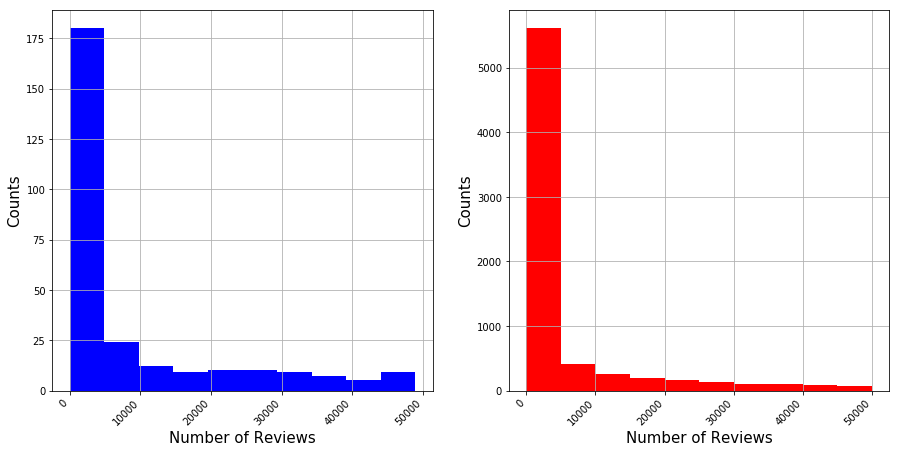

In [800]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
free_app_name_no_outlier['Reviews'].hist(color='blue')
plt.xlabel('Number of Reviews', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
no_free_app_name_no_outlier['Reviews'].hist(color='red')
plt.xlabel('Number of Reviews', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

In [753]:
free_app_name_no_outlier["Reviews"].describe()

count      275.000000
mean      8315.505455
std      12868.155321
min          0.000000
25%        182.000000
50%       1774.000000
75%       9951.000000
max      48929.000000
Name: Reviews, dtype: float64

In [755]:
no_free_app_name_no_outlier["Reviews"].describe()

count     7143.000000
mean      4774.316814
std       9999.529397
min          0.000000
25%         10.000000
50%        168.000000
75%       3357.000000
max      49971.000000
Name: Reviews, dtype: float64

## Conculsion 

Inclusion of word "FREE" in the app name or title has resulted in more number of installs and users reviews but it does not has any effect in terms of users satisfaction through "Rating". the word "FREE" still has its magic effect in attracting the users to download the apps but might not result in more satisfied userss, which might result in less user retention.

Adding the word "FREE" helps in getting users to try the app and experience it, many of them provided feedback through reviews as well, but despite the higher number of installs, users are not more satisfied with these apps compare to other apps. This could be due to the lower quality of these apps, or due to the higher number of app scams (apps do not provide what is promised in the app name or description).

## Future Research

For future research, The following research topics are recommended:

1- Why inclusion of the word "FREE" does not result in more satisfied users, despite the higher number of installs and users reviews? Evaluating user retention by analyzing active users over a specific time frame. The number of installs and uninstalls of the apps can be useful data for this study.

2- Does providing a free and paid (pro) versions of the app results in more installs to the paid apps compare to the apps with paid version only? Many apps in the market are providing a free app with limited features to help customers experience the app and explore the potential of the pro version (paid version) before they pay for it. Comparison between these apps and the apps with only a paid version might help in evaluating the effectiveness of this marketing strategy.